### Spam text message classification 

##### [스팸인지 아님 그냥 햄(메일)인지 구별하기 ]

- 출처 : https://www.kaggle.com/datasets/team-ai/spam-text-message-classification

스팸 메일 -> Category에 spam이라고 라벨링 됨 

스팸이 아닌 경우 -> Category에 ham이라고 라벨링 됨

간단할 것 같아서 가져왔는데 텍스트 분류 문제였다...


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/data.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# 메일 내용을 토큰화할 토크나이저 선택하기 -> 일단 맨 뒤 10개만 뽑아서 결과 비교해보기
# torch 에서 기본적으로 제공하는 토크나이저(torchtext) / spaCy / NLTK 

In [5]:
from nltk.tokenize import word_tokenize
from torchtext.data.utils import get_tokenizer
import spacy
# !python3 -m spacy download en_core_web_sm

In [6]:
# 메일 내용을 가져와서 토큰화하기 
torch_tokenizer = get_tokenizer('basic_english')
spacy_en = spacy.load('en_core_web_sm')

In [7]:
all_tt = [] ; all_wt = [] ; all_st = [] 


for contents in data['Message'][-11:-1]:
    all_tt.append(torch_tokenizer(contents))
    all_wt.append(word_tokenize(contents))
    all_st.append(spacy_en.tokenizer(contents))

    

In [8]:
print(all_tt) 
# 구두점, 특수문자는 다 빼버린다는게 단점인데 그래도 단어를 비교적 잘 나눈다고 볼 수 있다. 
# 대문자를 모두 다 소문자로 바꿔줘서 대문자/소문자로 인해 다른 단어로 처리되는 일은 없다는 것이 장점  

[['get', 'me', 'out', 'of', 'this', 'dump', 'heap', '.', 'my', 'mom', 'decided', 'to', 'come', 'to', 'lowes', '.', 'boring', '.'], ['ok', 'lor', '.', '.', '.', 'sony', 'ericsson', 'salesman', '.', '.', '.', 'i', 'ask', 'shuhui', 'then', 'she', 'say', 'quite', 'gd', '2', 'use', 'so', 'i', 'considering', '.', '.', '.'], ['ard', '6', 'like', 'dat', 'lor', '.'], ['why', 'don', "'", 't', 'you', 'wait', "'", 'til', 'at', 'least', 'wednesday', 'to', 'see', 'if', 'you', 'get', 'your', '.'], ['huh', 'y', 'lei', '.', '.', '.'], ['reminder', 'from', 'o2', 'to', 'get', '2', '.', '50', 'pounds', 'free', 'call', 'credit', 'and', 'details', 'of', 'great', 'offers', 'pls', 'reply', '2', 'this', 'text', 'with', 'your', 'valid', 'name', ',', 'house', 'no', 'and', 'postcode'], ['this', 'is', 'the', '2nd', 'time', 'we', 'have', 'tried', '2', 'contact', 'u', '.', 'u', 'have', 'won', 'the', '£750', 'pound', 'prize', '.', '2', 'claim', 'is', 'easy', ',', 'call', '087187272008', 'now1', '!', 'only', '10p', 'p

In [9]:
print(all_wt)

[['Get', 'me', 'out', 'of', 'this', 'dump', 'heap', '.', 'My', 'mom', 'decided', 'to', 'come', 'to', 'lowes', '.', 'BORING', '.'], ['Ok', 'lor', '...', 'Sony', 'ericsson', 'salesman', '...', 'I', 'ask', 'shuhui', 'then', 'she', 'say', 'quite', 'gd', '2', 'use', 'so', 'i', 'considering', '...'], ['Ard', '6', 'like', 'dat', 'lor', '.'], ['Why', 'do', "n't", 'you', 'wait', "'til", 'at', 'least', 'wednesday', 'to', 'see', 'if', 'you', 'get', 'your', '.'], ['Huh', 'y', 'lei', '...'], ['REMINDER', 'FROM', 'O2', ':', 'To', 'get', '2.50', 'pounds', 'free', 'call', 'credit', 'and', 'details', 'of', 'great', 'offers', 'pls', 'reply', '2', 'this', 'text', 'with', 'your', 'valid', 'name', ',', 'house', 'no', 'and', 'postcode'], ['This', 'is', 'the', '2nd', 'time', 'we', 'have', 'tried', '2', 'contact', 'u.', 'U', 'have', 'won', 'the', '£750', 'Pound', 'prize', '.', '2', 'claim', 'is', 'easy', ',', 'call', '087187272008', 'NOW1', '!', 'Only', '10p', 'per', 'minute', '.', 'BT-national-rate', '.'], [

In [10]:
print(all_st) # 토크나이징이 된건지 모르겠네 ; 

[Get me out of this dump heap. My mom decided to come to lowes. BORING., Ok lor... Sony ericsson salesman... I ask shuhui then she say quite gd 2 use so i considering..., Ard 6 like dat lor., Why don't you wait 'til at least wednesday to see if you get your ., Huh y lei..., REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode, This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate., Will ü b going to esplanade fr home?, Pity, * was in mood for that. So...any other suggestions?, The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free]


[의견]

스팸인지 그냥 햄(메일)인지 구별하기 위해서 구두점이 중요한 역할을 하는지 생각해볼 필요가 있다. 

대화체처럼 구두점이 중요한 역할을 한다면, 구두점 자체를 살려서 가져갈 필요가 있지만 우린 스팸인지 햄인지 구별하는거라 구두점이 의미가 있는지가 궁금함

우리가 평소에 받는 스팸 메일의 경우의 특징을 생각해보자.

내 스팸 메일함을 살펴보면 -> 최저가 , 부업, 법률상담, 할인, 이벤트, 창업, 소득 등 특정 단어가 들어감. 

내가 사용하는 데이터에도 이렇게 스팸 메일이라고 분류할만한 단어가 있는지, 확인해보자. 

In [11]:
spam_contents = data[data['Category'] == "spam"]['Message']

print("spam 메일 개수 (전체 데이터 : 5572개) : ", len(spam_contents))
print("전체 메일 중 스팸 메일의 비율 : ", (len(spam_contents) / len(data)) *100)

spam 메일 개수 (전체 데이터 : 5572개) :  747
전체 메일 중 스팸 메일의 비율 :  13.406317300789663


In [12]:
for s in spam_contents[:20]:
    print(s)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [13]:
# 구두점 특히 '(어퍼스트로피) 가 스팸메일에 얼마나 들어가고 주로 어떻게 사용되는지 확인해보기 (구두점이 실제 스팸 메일을 구별하는데 필요한지 확인하기 위함)
# 구두점을 살리는 토크나이저로 가져와보기  -> tensorflow 의 keras 사용 

from tensorflow.keras.preprocessing.text import text_to_word_sequence


apost = []
all_word_counts = 0 

for contents in spam_contents:
    tokens = text_to_word_sequence(contents)
    all_word_counts+=len(tokens)
    for t in tokens : 
        if "'" in t: 
            apost.append(t)

print("spam 메일에서 token 의 개수 :", all_word_counts)
print("spam 메일에서 apostrophe 개수 : ", len(apost))
print("spam 메일의 전체 토큰 중 apostrophe의 비율 :", (len(apost) / all_word_counts) * 100)
print(apost)

spam 메일에서 token 의 개수 : 18821
spam 메일에서 apostrophe 개수 :  121
spam 메일의 전체 토큰 중 apostrophe의 비율 : 0.6428988895382818
["c's", "08452810075over18's", "it's", "week's", "i'd", "ken's", "uk's", "you'll", "haven't", "i'm", "c's", "'help'", "c's", "uk's", "today's", "t's", "c's", "i'm", "i'm", "we'll", "c's", "moon's", "today's", "1000's", "u've", "don't", "don't", "don't", "let's", "1000's", "c's", "08452810075over18's", "c's", "'uptown", "girl'", "80's", "george's", "u've", "month's", "we'll", "t's", "c's", "uk's", "'help'", "b'tooth", "u've", "c's", "there's", "george's", "i'm", "'", "don't", "don't", "let's", "i'm", "t's", "c's", "uk's", "uk's", "don't", "don't", "let's", "t's", "c's", "\x93it's", "you've", "c's", "you're", "you've", "'help'", "c's", "you've", "uk's", "rct'", "let's", "i'm", "won't", "t's", "c's", "they're", "100's", "valentine's", "won't", "it's", "it's", "you've", "you're", "moon's", "don't", "weekend's", "i've", "i'm", "can't", "'help'", "week's", "u've", "uk's", "today's

[의견]

spam 메일에서 apostrophe를 가지고 있는 토큰의 비율은 0.64%로 적은 편이며 단어를 살펴봤을 때 중요한 단어는 없는 것으로 판단. (URGENT, PRIVATE, free ..)

spam 메일에서 apostrophe는 삭제해도 무방할 것 같지만..? 실제 햄메일에서는 apostrophe가 중요한 역할을 할 수도 있으므로 확인 필요 

햄메일에서도 그닥 중요한 역할을 하지 않는다면 apostrophe는 굳이 포함하지 않는 torchtext 를 사용해도 될 것 같다. 


In [14]:
# 햄메일 확인해보기
normal_contents = data[data['Category'] != "spam"]['Message']

for n in normal_contents[:20]:
    print(n)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
I HAVE A DATE ON SUNDAY WITH WILL!!
Oh k...i'm watching here:)
Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.
Fine if thats the way u feel. Thats the way its gota 

In [15]:
# 구두점 특히 '(어퍼스트로피) 가 스팸메일에 얼마나 들어가고 주로 어떻게 사용되는지 확인해보기 (구두점이 실제 스팸 메일을 구별하는데 필요한지 확인하기 위함)
# 구두점을 살리는 토크나이저로 가져와보기  -> tensorflow 의 keras 사용 

from tensorflow.keras.preprocessing.text import text_to_word_sequence


apost = []
all_word_counts = 0 

for contents in normal_contents:
    tokens = text_to_word_sequence(contents)
    all_word_counts+=len(tokens)
    for t in tokens : 
        if "'" in t: 
            apost.append(t)

print("normal 메일에서 token 의 개수 :", all_word_counts)
print("normal 메일에서 apostrophe 개수 : ", len(apost))
print("normal 메일의 전체 토큰 중 apostrophe의 비율 :", (len(apost) / all_word_counts) * 100)
print(apost)

normal 메일에서 token 의 개수 : 69703
normal 메일에서 apostrophe 개수 :  1697
normal 메일의 전체 토큰 중 apostrophe의 비율 : 2.434615439794557
["don't", "'melle", "'", "i'm", "don't", "i've", "i've", "i'm", "i'm", "i'm", "mom's", "i'm", "we're", "i'll", "there's", "that's", "that's", "doesn't", "won't", "i'll", "roommate's", "how's", "you'd", "i'm", "didn't", "can't", "don't", "didn't", "i'm", "he's", "i'm", "didn't", "don't", "i'm", "i'm", "i'll", "can't", "ta's", "i'll", "don't", "i'm", "i'm", "i'm", "haven't", "don't", "i'm", "'melle", "'", "you're", "didn't", "i'll", "isn't", "he's", "i'm", "i'm", "i'm", "''", "b'day", "''", "he's", "ü'll", "hasn't", "shouldn't", "i'm", "it's", "you're", "i'm", "'melle", "'", "i'm", "see's", "i'm", "i'm", "one's", "i'm", "you've", "won't", "we'd", "where's", "i'm", "i've", "you've", "''", "b'day", "''", "what's", "haven't", "there's", "i'll", "i'm", "i'm", "i'm", "it's", "u've", "i'm", "don't", "didn't", "i'm", "you're", "don't", "i'm", "i'm", "we're", "i'll", "guy's", "i

[의견]

그냥 어퍼스트로피만 모아서 봤을 때는 개수도 적고 필요없어보이긴하는데 스팸메일인지 햄메일인지 구별할 때 어떻게 사용될지 모르겠다.. 

normal 메일의 토큰과 spam 메일의 토큰 비교해보고 특징이 있는지 확인

In [16]:
def classify_apostrophe(text : str): # TODO 앞에 있는 코드도 이걸로 정리하기 
    apost = [] # 어퍼스트로피 있는 것만 
    refine_apost = [] # 어퍼스트로피 없는 것만
    tokens = text_to_word_sequence(text)
    for t in tokens : 
        if "'" in t: 
            apost.append(t)
        else: 
            refine_apost.append(t)
    return apost, refine_apost

In [17]:
# 스팸메일 , 햄메일의 토큰 중 상위 10개만 확인해보기 
from collections import Counter

all_s_tokens = [] 
all_n_tokens = [] 


num = 500
for s,n in zip(spam_contents[:num], normal_contents[:num]):
    _,s_tokens = classify_apostrophe(s)
    _,n_tokens = classify_apostrophe(n)
    
    all_s_tokens.extend(s_tokens)
    all_n_tokens.extend(n_tokens)

print(f"스팸 메일 {num} 개의 토큰 개수 : ",len(all_s_tokens))
print(f"햄 메일 {num} 개의 토큰 개수 : ",len(all_n_tokens))

print("스팸 메일 중 자주 등장한 토큰 top 10개", Counter(all_s_tokens).most_common(10))
print("햄 메일 중 자주 등장한 토큰 top 10개", Counter(all_n_tokens).most_common(10))


스팸 메일 500 개의 토큰 개수 :  12582
햄 메일 500 개의 토큰 개수 :  7083
스팸 메일 중 자주 등장한 토큰 top 10개 [('to', 480), ('a', 252), ('call', 219), ('you', 193), ('your', 162), ('free', 154), ('now', 144), ('2', 133), ('for', 132), ('the', 132)]
햄 메일 중 자주 등장한 토큰 top 10개 [('i', 261), ('you', 250), ('to', 149), ('the', 128), ('a', 125), ('my', 102), ('in', 87), ('and', 86), ('me', 81), ('u', 79)]


[의견]

- 스팸메일의 길이가 햄메일보다 토큰의 길이가 길다. 
- 어퍼스트로피 없어도 무방할 것 같고, stopword와 길이가 짧은 단어(길이 1,2인 경우들) 제거가 필요함. 
- 토크나이저는 torch의 토크나이저를 사용하기로 결정

In [18]:
# 불용어 제거하기 

from nltk.corpus import stopwords
# nltk.download('stopwords')
stopword = stopwords.words('english')
print("영어 stopword 개수 : ", len(stopword))

영어 stopword 개수 :  179


In [19]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
import string

# 1. stopword에 해당하는 토큰 제거 
# 2. punctuation 제거 
# 3. 글자의 길이가 2 이상인 것만 가져오기 (a,i 같이 불필요한 한 단어짜리는 제거)

def preprocess_token(text : str) -> str:
    refine_tt = [] 
    tt = torch_tokenizer(text)
    for t in tt :
        if t not in stopword and len(t) >= 2:
            if t not in string.punctuation:
                refine_tt.append(t)
    return ' '.join(refine_tt) #텍스트로 return 

In [21]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
# 정제된 텍스트는 data 데이터프레임에 clean_message 칼럼에 저장함 

data['clean_message'] = data['Message'].apply(lambda x: preprocess_token(x))

In [23]:
data

,Category,Message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact £750 pound prize claim ...
5568,ham,Will ü b going to esplanade fr home?,going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


[의견]
- label 값이 ham, spam 두 개 뿐이라서 0과 1로 변환하면 좋을 것 같음. 
- 0은 햄메일 (일반메일), 1은 스팸메일 

In [24]:
# label에 해당하는 값이 ham , spam

def encode_label(label : str) -> bool : 
    if label == "ham":
        return 0 
    else:
        return 1 

In [25]:
data['encode_category'] = data['Category'].apply(lambda x: encode_label(x))

In [26]:
data

,Category,Message,clean_message,encode_category
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,1
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact £750 pound prize claim ...,1
5568,ham,Will ü b going to esplanade fr home?,going esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,0
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,0


In [27]:
# 모델 학습/테스트 용 데이터 나누기

from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data["clean_message"],data["encode_category"],test_size=0.2,shuffle=True)

In [29]:
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [30]:
X_train

1425                                      yes saw message
547     know need get hotel got invitation apologise c...
2498                                dai da send resume id
4438                                     come got nothing
2137                                     well done luv ya
                              ...                        
3093                dear take care reaching home love lot
1411                            pls speak customer machan
5113    definitely need module humanities dis sem izzi...
5378    free entry gr8prizes wkly comp chance win late...
1085    love start attraction feel need every time aro...
Name: clean_message, Length: 4457, dtype: object

[의견] 

- vectorizing 필요 -> 텍스트를 컴퓨터가 읽어야하니깐 
- tfidf 생각한 이유 : 아까 Counter로 스팸메일 확인해보니 free 같은 특징적인 단어가 보였음

정제된 스팸 메일 중 자주 등장한 토큰 top 20개 :  [('call', 343), ('free', 215), ('txt', 155), ('ur', 144), ('mobile', 123), ('text', 120), ('stop', 118), ('claim', 111), ('reply', 104), ('prize', 91), ('www', 85), ('get', 84), ('send', 69), ('new', 69), ('nokia', 65), ('uk', 63), ('win', 62), ('cash', 62), ('urgent', 62), ('service', 55)]


Text(0.5, 1.0, 'Top 20 frequently appearing tokens in cleaned spam emails')

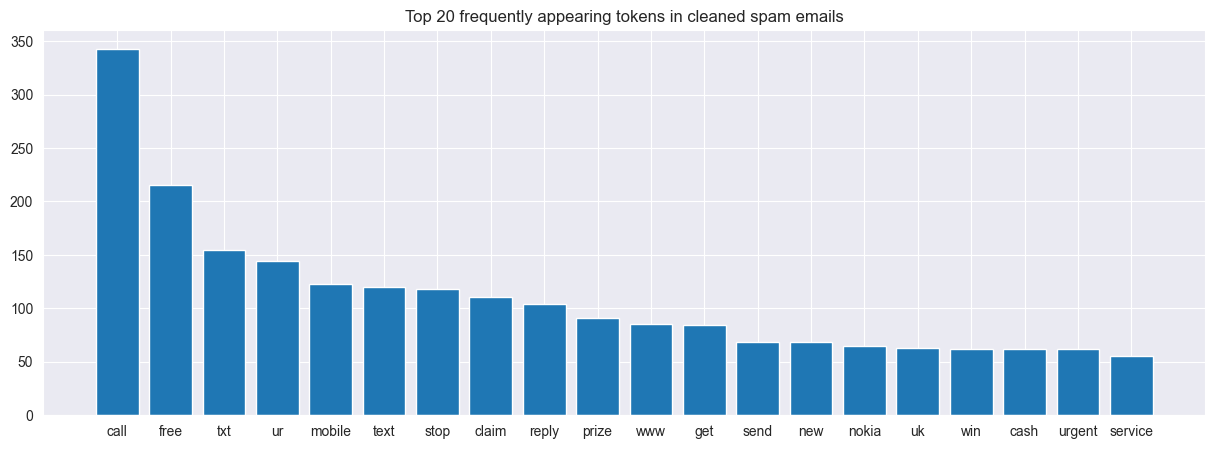

In [31]:
# clean_message 에서 스팸메일 / 햄메일 자주 등장한 토큰 top 20개만
import matplotlib.pyplot as plt

clean_spam_message = data[data['encode_category'] == 1]['clean_message']
clean_spam = [] 
for mes in clean_spam_message:
    clean_spam.extend(mes.split())

result = Counter(clean_spam).most_common(20)

print("정제된 스팸 메일 중 자주 등장한 토큰 top 20개 : ",result)

keys , values = [] , []

for k,v in result:
    keys.append(k)
    values.append(v)

plt.figure(figsize=(15, 5))
plt.bar(keys,values)
plt.title("Top 20 frequently appearing tokens in cleaned spam emails")
# plt.xticks(rotation = 35)

정제된 햄 메일 중 자주 등장한 토큰 top 20개 :  [('&lt', 314), ('get', 304), ('ok', 288), ('#&gt', 276), ('go', 252), ('ur', 247), ('call', 238), ('know', 237), ('good', 235), ('like', 234), ('got', 233), ('come', 230), ('love', 205), ('day', 204), ('time', 194), ('going', 169), ('one', 168), ('home', 165), ('want', 164), ('lor', 162)]


Text(0.5, 1.0, 'Top 20 frequently appearing tokens in cleaned ham emails')

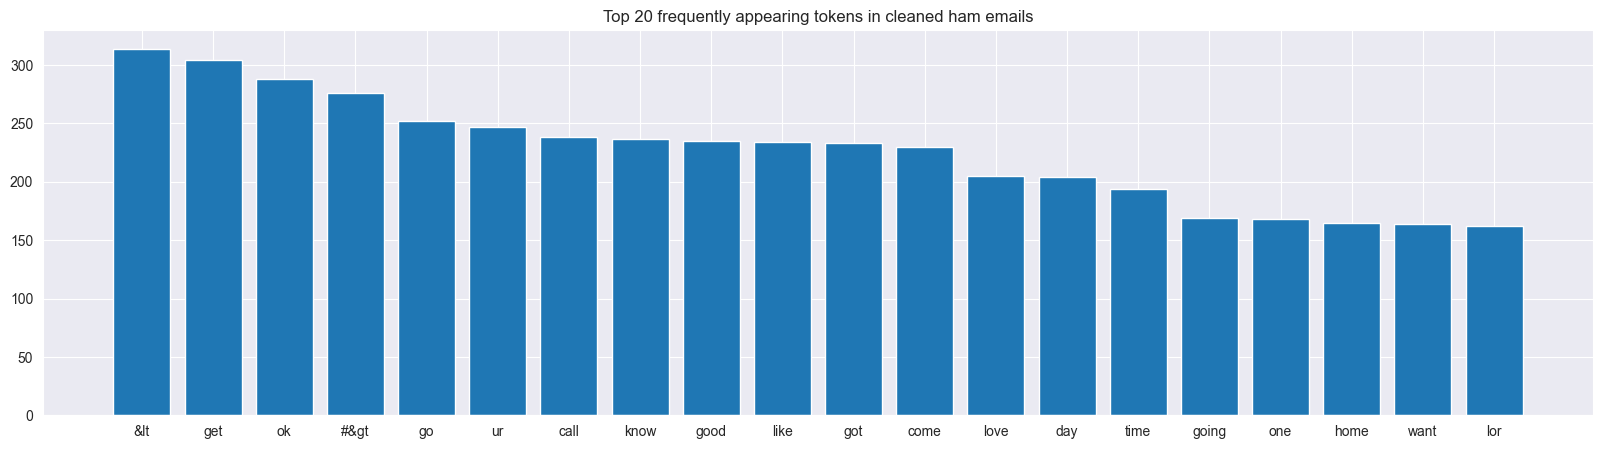

In [32]:
clean_normal_message = data[data['encode_category'] == 0]['clean_message']
clean_normal = [] 
for mes in clean_normal_message:
    clean_normal.extend(mes.split())
result = Counter(clean_normal).most_common(20)

print("정제된 햄 메일 중 자주 등장한 토큰 top 20개 : ", Counter(clean_normal).most_common(20))

keys , values = [] , []

for k,v in result:
    keys.append(k)
    values.append(v)

plt.figure(figsize=(20, 5))
plt.bar(keys,values)
plt.title("Top 20 frequently appearing tokens in cleaned ham emails")
# plt.xticks(rotation = 35)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF 
# TF : 하나의 문장(문서)에서 특정 단어가 등장하는 횟수
# DF : 특정 단어가 몇 개의 문장(문서)에서 등장하는지 (Inverse)
# 적은 문장(문서)에 등장할수록 큰 숫자가 되게하고 반대로 많은 문장(문서)에 등장할수록 숫자를 작아지게 함
# 여러 문장(문서)에 의미 없이 사용되는 단어의 가중치를 줄이기 위해서

tfidf_vectorizer = TfidfVectorizer()
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [34]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression 
# 이진분류라서 Logistic Regression 채택 

# lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf=LogisticRegression()
lr_tfidf.fit(X_train_vectors_tfidf, y_train) 


y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))
print(f1_score(y_test,y_predict))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98       969
           1       0.96      0.75      0.85       146

    accuracy                           0.96      1115
   macro avg       0.96      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

0.9641255605381166
0.8461538461538461


### gemini로 임베딩 구해서 테스트해보기 
- ValueError: content must not be empty 에러 발생 -> 아무래도 정제하는 과정에서 빈 문자열이 들어간 경우가 있는 것으로 파악됨 
- 전체 개수가 몇 개고 빈 문자열 제거 후 어떻게 바뀌는지 데코레이터로 구현해보기 



In [35]:
# !pip install -U -q google.generativeai
# !pip install --upgrade pip


In [36]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import google.ai.generativelanguage as glm

load_dotenv(verbose=True)


True

In [37]:
key = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=key)

In [38]:
refine_data = data.copy() 

In [39]:
for i in range(data.shape[0]):
    row = data.iloc[i]
    if row['clean_message'] == '':
        print(row['Category']) # 모두다 햄이네 ..  값을 지워버리자   
    

ham
ham
ham
ham
ham
ham
ham
ham
ham
ham
ham
ham


In [40]:
data = data.drop(data[data['clean_message'] == ''].index)
print(data.shape)

(5560, 4)


In [41]:
data

,Category,Message,clean_message,encode_category
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,1
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact £750 pound prize claim ...,1
5568,ham,Will ü b going to esplanade fr home?,going esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,0
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,0


In [42]:
from tqdm.auto import tqdm
tqdm.pandas()
from google.api_core import retry

def make_embed_text_fn(model):

    @retry.Retry(timeout=300.0)
    def embed_fn(text: str) -> list[float]:
        # Set the task_type to CLASSIFICATION.
        embedding = genai.embed_content(model=model,
                                        content=text,
                                        task_type="classification")
        return embedding['embedding']

    return embed_fn

def create_embeddings(model, df):
    df['G_Embeddings'] = df['clean_message'].progress_apply(make_embed_text_fn(model))
    return df

In [43]:
model = 'models/embedding-001'
gemini_embedding = create_embeddings(model,data)


  0%|          | 0/5560 [00:00<?, ?it/s]

임베딩 후 classification 하는 튜토리얼 코드가 있는데 그거 가져와서 진행해볼 예정 

In [44]:
data

,Category,Message,clean_message,encode_category,G_Embeddings
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...,0,"[0.028807206, -0.03621563, -0.050047267, -0.04..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,0,"[0.028476495, 0.0013876868, -0.06420778, -0.01..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,1,"[0.05030803, -0.07512517, -0.042560495, -0.074..."
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,0,"[-0.007327647, -0.022901433, -0.024781676, -0...."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,0,"[0.023844084, -0.016894948, -0.01716121, -0.06..."
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact £750 pound prize claim ...,1,"[0.0053461296, -0.05480214, -0.055548646, -0.0..."
5568,ham,Will ü b going to esplanade fr home?,going esplanade fr home,0,"[0.033655215, -0.0031889905, -0.039510705, -0...."
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,0,"[-0.002391516, -0.021267267, -0.046133913, -0...."
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,0,"[0.012761247, -0.027776903, -0.03975404, -0.06..."


In [45]:
data.to_csv("./google_embedding_data.csv")